In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
import lightgbm
import catboost

train = pd.read_csv('/Users/elizavetazagonova/Documents/Магистратура/Data mining/otto-group-product-classification-challenge/train.csv')
test = pd.read_csv('/Users/elizavetazagonova/Documents/Магистратура/Data mining/otto-group-product-classification-challenge/test.csv')

In [193]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [194]:
train.shape

(61878, 95)

In [195]:
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [196]:
for i in train.dtypes:
    if i!='int64':
        print(i)

object


In [188]:
train.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


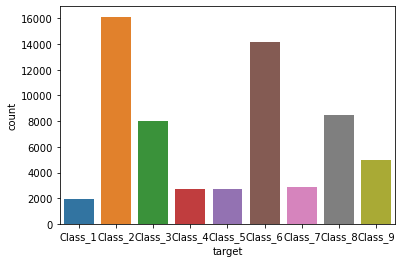

In [189]:
sns.countplot(train.target)
plt.show()

In [203]:
X=train.iloc[:,1:94]
y=train['target']
l = LabelEncoder()
y = l.fit_transform(y)
y

array([0, 0, 0, ..., 8, 8, 8])

In [198]:
train_data, test_data, train_target, test_target = train_test_split(X,y,test_size = 0.3)

In [199]:
train_data, valid_data, train_target, valid_target = train_test_split(train_data,train_target,test_size = 0.3)

In [200]:
dt = DecisionTreeClassifier()
dt.fit(train_data,train_target)

DecisionTreeClassifier()

In [202]:
accuracy_score(test_target,dt.predict(test_data))

0.6947317388493859

In [109]:
for i in range(1,100,5):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(train_data,train_target)
    print(i,accuracy_score(valid_target,dt.predict(valid_data)), accuracy_score(train_target,dt.predict(train_data)))


1 0.35929203539823007 0.3689105841221676
6 0.550750288572528 0.5615620567960685
11 0.6440938822624086 0.672845410468683
16 0.6882647171989227 0.7658563936805304
21 0.6998845709888418 0.8478511824268611
26 0.7006540977298961 0.9144101058742043
31 0.6989611388995768 0.9611134931890893
36 0.6953443632166217 0.9841683432830898
41 0.6961908426317814 0.9948217289488439
46 0.6949595998460947 0.9979550776740658
51 0.6934205463639862 0.9989775388370329
56 0.694497883801462 0.9994063128731159
61 0.6910350134667179 0.9997031564365579
66 0.6934974990380915 0.9998680695273591
71 0.6928818776452482 1.0
76 0.6920353982300885 1.0
81 0.6937283570604078 1.0
86 0.693035782993459 1.0
91 0.6903424393997691 1.0
96 0.6939592150827242 1.0


In [112]:
dtc_final=DecisionTreeClassifier(max_depth=16)
dtc_final.fit(train_data,train_target)
print(accuracy_score(test_target,dtc_final.predict(test_data)), accuracy_score(train_target,dtc_final.predict(train_data)))


0.696078431372549 0.7658893762986906


In [113]:

rf = RandomForestClassifier()
rf.fit(train_data,train_target)
accuracy_score(test_target,rf.predict(test_data))


0.7977267830209007

In [123]:
for i in range(1,200,5):
    dt = RandomForestClassifier(n_estimators=i)
    dt.fit(train_data,train_target)
    print(i,accuracy_score(valid_target,dt.predict(valid_data)), accuracy_score(train_target,dt.predict(train_data)))


1 0.6419392073874567 0.8704442758666183
6 0.739899961523663 0.9775058544147235
11 0.7606002308580223 0.9944259375309212
16 0.7716814159292036 0.9972624426927009
21 0.7744517121969988 0.998845608364392
26 0.7803770681031166 0.9991754345459942
31 0.7826856483262793 0.9995382433457568
36 0.7799923047325894 0.9996701738183977
41 0.7775298191612159 0.9998350869091989
46 0.7827626010003848 0.9998680695273591
51 0.7844555598307041 1.0
56 0.787687572143132 1.0
61 0.7853789919199692 1.0
66 0.787148903424394 1.0
71 0.7846864178530204 1.0
76 0.7873797614467103 0.9999670173818398
81 0.7918430165448249 1.0
86 0.7874567141208157 1.0
91 0.7861485186610234 0.9999670173818398
96 0.790227010388611 0.9999670173818398
101 0.788611004232397 1.0
106 0.7894574836475567 1.0
111 0.7883801462100808 1.0
116 0.7883031935359753 1.0
121 0.7893805309734513 1.0
126 0.7906117737591382 1.0
131 0.7895344363216622 1.0
136 0.7885340515582917 1.0
141 0.7894574836475567 1.0
146 0.7895344363216622 1.0
151 0.7894574836475567 

In [116]:
for j in range(1,50,5):
    dt = RandomForestClassifier(n_estimators=25,max_features=j)
    dt.fit(train_data,train_target)
    print(j,accuracy_score(valid_target,dt.predict(valid_data)), accuracy_score(train_target,dt.predict(train_data)))


1 0.7442862639476722 0.9997691216728783
6 0.7707579838399384 0.9993403476367954
11 0.7806079261254328 0.9993073650186352
16 0.7812235475182763 0.9991754345459942
21 0.7857637552904964 0.9990435040733533
26 0.7809157368218546 0.999142451927834
31 0.7823778376298577 0.999142451927834
36 0.7818391689111197 0.998845608364392
41 0.7829165063485957 0.9989115736007125
46 0.7802231627549058 0.9989445562188727


In [122]:
for k in range(1,50,5):
    dt = RandomForestClassifier(n_estimators=25, max_depth=k, max_features=31)
    dt.fit(train_data,train_target)
    print(k,accuracy_score(valid_target,dt.predict(valid_data)), accuracy_score(train_target,dt.predict(train_data)))

1 0.42947287418237784 0.4370856558593621
6 0.6292420161600616 0.648702133975395
11 0.713120430934975 0.7512450938355487
16 0.7506733358984224 0.8383851710148752
21 0.7712966525586764 0.9112437745308223
26 0.7792997306656406 0.9588047099178733
31 0.7816083108888033 0.9822223688116363
36 0.7809157368218546 0.9931396154226723
41 0.7816852635629088 0.997856129819585
46 0.7790688726433244 0.9985487648009499


In [126]:
dt=RandomForestClassifier(n_estimators=25, max_depth=31, max_features=31)
dt.fit(train_data,train_target)
print(accuracy_score(test_target,dt.predict(test_data)), accuracy_score(train_target,dt.predict(train_data)))

0.7907239819004525 0.9837395692470068


In [124]:
lgbm = lightgbm.LGBMClassifier()
lgbm.fit(train_data,train_target)
accuracy_score(test_target,lgbm.predict(test_data))

0.8012281835811248

In [127]:
for i in range(1,200,5):
    lgbm = lightgbm.LGBMClassifier(n_estimators=i)
    lgbm.fit(train_data,train_target)
    print(i,accuracy_score(valid_target,lgbm.predict(valid_data)), accuracy_score(train_target,lgbm.predict(train_data)))



1 0.45225086571758366 0.4607012104620865
6 0.6994228549442093 0.7253867211979287
11 0.7322816467872258 0.7645370889541212
16 0.7452096960369373 0.7785217190540585
21 0.7548287803001155 0.7917807315544708
26 0.7611388995767603 0.799861473003727
31 0.7662947287418238 0.8082390580164254
36 0.7702962677953059 0.8144397902305485
41 0.7750673335898423 0.821695966225799
46 0.7794536360138515 0.8268412546587948
51 0.782070026933436 0.8320525083281111
56 0.7849942285494421 0.8373297272337478
61 0.7866871873797614 0.8413206240311356
66 0.7889188149288188 0.8473564431544576
71 0.7903039630627164 0.8513473399518454
76 0.7919199692189304 0.8552063062765922
81 0.7931512120046171 0.8581417592928526
86 0.7929203539823009 0.8619017777631188
91 0.7945363601385148 0.8646723176885781
96 0.793843786071566 0.8685642666314852
101 0.7955367449018853 0.8726541112833537
106 0.79545979222778 0.8761172861901778
111 0.7956906502500962 0.8792506349153996
116 0.7973836090804155 0.8827467924403839
121 0.7974605617545

In [129]:
for j in range(1,50,5):
    lgbm = lightgbm.LGBMClassifier(n_estimators=180,max_depth=j)
    lgbm.fit(train_data,train_target)
    print(j,accuracy_score(valid_target,lgbm.predict(valid_data)), accuracy_score(train_target,lgbm.predict(train_data)))



1 0.7200461716044633 0.7341600976285497
6 0.7931512120046171 0.879448530624361
11 0.7966910350134667 0.9077805996239982
16 0.8000769526741054 0.9124641314027507
21 0.8018468641785302 0.9124971140209109
26 0.8004617160446326 0.9135855404201986
31 0.8004617160446326 0.9135855404201986
36 0.8004617160446326 0.9135855404201986
41 0.8004617160446326 0.9135855404201986
46 0.8004617160446326 0.9135855404201986


In [130]:
lgbm=lightgbm.LGBMClassifier(n_estimators=180, max_depth=20)
lgbm.fit(train_data,train_target)
print(accuracy_score(test_target,lgbm.predict(test_data)), accuracy_score(train_target,lgbm.predict(train_data)))

0.8086080586080586 0.9134865925657178


In [53]:

cb = catboost.CatBoostClassifier()
cb.fit(train_data,train_target)
accuracy_score(test_target,cb.predict(test_data))

Learning rate set to 0.094165
0:	learn: 1.9620037	total: 34.6ms	remaining: 34.5s
1:	learn: 1.8215133	total: 62.1ms	remaining: 31s
2:	learn: 1.7206846	total: 87.4ms	remaining: 29.1s
3:	learn: 1.6330708	total: 118ms	remaining: 29.3s
4:	learn: 1.5588259	total: 147ms	remaining: 29.3s
5:	learn: 1.4996448	total: 178ms	remaining: 29.5s
6:	learn: 1.4459459	total: 212ms	remaining: 30.1s
7:	learn: 1.4026404	total: 245ms	remaining: 30.4s
8:	learn: 1.3605595	total: 273ms	remaining: 30.1s
9:	learn: 1.3193666	total: 304ms	remaining: 30.1s
10:	learn: 1.2895368	total: 332ms	remaining: 29.9s
11:	learn: 1.2611334	total: 361ms	remaining: 29.7s
12:	learn: 1.2336198	total: 392ms	remaining: 29.8s
13:	learn: 1.2058224	total: 424ms	remaining: 29.9s
14:	learn: 1.1806377	total: 460ms	remaining: 30.2s
15:	learn: 1.1554204	total: 497ms	remaining: 30.6s
16:	learn: 1.1352370	total: 528ms	remaining: 30.5s
17:	learn: 1.1187710	total: 562ms	remaining: 30.6s
18:	learn: 1.1039369	total: 589ms	remaining: 30.4s
19:	learn:

0.8009049773755657

In [131]:
for i in range(1,200,5):
    cb = catboost.CatBoostClassifier(n_estimators=i)
    cb.fit(train_data,train_target)
    print(i,accuracy_score(valid_target,cb.predict(valid_data)), accuracy_score(train_target,cb.predict(train_data)))



Learning rate set to 0.5
0:	learn: 1.4390116	total: 67ms	remaining: 0us
1 0.5514428626394767 0.5594181866156536
Learning rate set to 0.5
0:	learn: 1.4390116	total: 39.9ms	remaining: 199ms
1:	learn: 1.2171017	total: 71.9ms	remaining: 144ms
2:	learn: 1.0730218	total: 103ms	remaining: 103ms
3:	learn: 0.9923971	total: 136ms	remaining: 68.2ms
4:	learn: 0.9385634	total: 167ms	remaining: 33.4ms
5:	learn: 0.8939892	total: 205ms	remaining: 0us
6 0.6763370527125817 0.6941851644183515
Learning rate set to 0.5
0:	learn: 1.4390116	total: 34ms	remaining: 340ms
1:	learn: 1.2171017	total: 68.3ms	remaining: 307ms
2:	learn: 1.0730218	total: 98.8ms	remaining: 263ms
3:	learn: 0.9923971	total: 138ms	remaining: 241ms
4:	learn: 0.9385634	total: 190ms	remaining: 229ms
5:	learn: 0.8939892	total: 236ms	remaining: 197ms
6:	learn: 0.8655927	total: 271ms	remaining: 155ms
7:	learn: 0.8344173	total: 312ms	remaining: 117ms
8:	learn: 0.8083570	total: 353ms	remaining: 78.4ms
9:	learn: 0.7846669	total: 399ms	remaining: 

In [132]:
for j in range(1,200,5):
    cb = catboost.CatBoostClassifier(n_estimators=50,max_depth=j)
    cb.fit(train_data,train_target)
    print(j,accuracy_score(valid_target,cb.predict(valid_data)), accuracy_score(train_target,cb.predict(train_data)))



Learning rate set to 0.5
0:	learn: 1.8285739	total: 20.5ms	remaining: 1s
1:	learn: 1.6633786	total: 38.9ms	remaining: 935ms
2:	learn: 1.5557254	total: 57.6ms	remaining: 902ms
3:	learn: 1.4653684	total: 75.1ms	remaining: 863ms
4:	learn: 1.4011789	total: 92.4ms	remaining: 832ms
5:	learn: 1.3511943	total: 110ms	remaining: 804ms
6:	learn: 1.3182705	total: 125ms	remaining: 767ms
7:	learn: 1.2848894	total: 143ms	remaining: 750ms
8:	learn: 1.2526599	total: 158ms	remaining: 719ms
9:	learn: 1.2306734	total: 173ms	remaining: 692ms
10:	learn: 1.2076489	total: 188ms	remaining: 666ms
11:	learn: 1.1817011	total: 204ms	remaining: 647ms
12:	learn: 1.1591038	total: 221ms	remaining: 630ms
13:	learn: 1.1355252	total: 238ms	remaining: 613ms
14:	learn: 1.1187329	total: 256ms	remaining: 597ms
15:	learn: 1.0955995	total: 271ms	remaining: 576ms
16:	learn: 1.0873539	total: 286ms	remaining: 555ms
17:	learn: 1.0741730	total: 303ms	remaining: 538ms
18:	learn: 1.0492979	total: 318ms	remaining: 519ms
19:	learn: 1.0

KeyboardInterrupt: 

In [206]:
final_mod=lightgbm.LGBMClassifier(n_estimators=180, max_depth=20)
final_mod.fit(train_data,train_target)
print(accuracy_score(test_target,final_mod.predict(test_data)))

0.8752545331135461


In [172]:
test_=test.iloc[:,1:94]
test_

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
144364,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0
144366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [173]:
y_test=final_mod.predict(test_)
y_test

array([3, 5, 5, ..., 1, 3, 2])

In [174]:
y_test_proba=final_mod.predict_proba(test_)
y_test_proba

array([[3.73174315e-04, 1.55343281e-01, 2.03120116e-01, ...,
        1.38445294e-02, 1.38009941e-03, 1.94791393e-04],
       [2.28198052e-03, 4.53776567e-02, 1.00438110e-02, ...,
        1.36189507e-03, 1.77261929e-01, 1.88704535e-03],
       [2.53890787e-05, 8.61769244e-05, 1.59551829e-04, ...,
        9.58237646e-05, 1.50783502e-03, 1.86431083e-05],
       ...,
       [1.46696846e-03, 5.82348159e-01, 2.84654322e-01, ...,
        2.43246543e-03, 1.30190080e-03, 3.16456452e-04],
       [2.63027639e-04, 2.51661055e-01, 2.23846932e-02, ...,
        6.46571428e-04, 1.36319268e-04, 7.92744921e-05],
       [5.28674744e-04, 4.01751067e-01, 4.44086628e-01, ...,
        7.38670981e-02, 6.09566615e-04, 2.86135496e-04]])

In [175]:
final = pd.DataFrame(y_test_proba,columns = ['Class_'+str(i) for i in range(1,10)])
final

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.000373,0.155343,0.203120,0.624198,1.413440e-05,0.001532,0.013845,0.001380,0.000195
1,0.002282,0.045378,0.010044,0.005756,4.547391e-04,0.755574,0.001362,0.177262,0.001887
2,0.000025,0.000086,0.000160,0.000013,7.354900e-07,0.998093,0.000096,0.001508,0.000019
3,0.000145,0.543522,0.448424,0.006275,1.307612e-05,0.000279,0.000225,0.000260,0.000858
4,0.189357,0.000977,0.001346,0.000455,5.217122e-05,0.002954,0.009510,0.140304,0.655046
...,...,...,...,...,...,...,...,...,...
144363,0.433396,0.011693,0.008150,0.015641,8.160548e-05,0.438950,0.030590,0.018699,0.042798
144364,0.001140,0.347345,0.463507,0.065560,1.785000e-05,0.001871,0.119419,0.000687,0.000453
144365,0.001467,0.582348,0.284654,0.126171,2.838549e-05,0.001280,0.002432,0.001302,0.000316
144366,0.000263,0.251661,0.022385,0.724639,7.960514e-06,0.000182,0.000647,0.000136,0.000079


In [176]:
final.insert(loc=0,column='id',value = test['id'])
final

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.000373,0.155343,0.203120,0.624198,1.413440e-05,0.001532,0.013845,0.001380,0.000195
1,2,0.002282,0.045378,0.010044,0.005756,4.547391e-04,0.755574,0.001362,0.177262,0.001887
2,3,0.000025,0.000086,0.000160,0.000013,7.354900e-07,0.998093,0.000096,0.001508,0.000019
3,4,0.000145,0.543522,0.448424,0.006275,1.307612e-05,0.000279,0.000225,0.000260,0.000858
4,5,0.189357,0.000977,0.001346,0.000455,5.217122e-05,0.002954,0.009510,0.140304,0.655046
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0.433396,0.011693,0.008150,0.015641,8.160548e-05,0.438950,0.030590,0.018699,0.042798
144364,144365,0.001140,0.347345,0.463507,0.065560,1.785000e-05,0.001871,0.119419,0.000687,0.000453
144365,144366,0.001467,0.582348,0.284654,0.126171,2.838549e-05,0.001280,0.002432,0.001302,0.000316
144366,144367,0.000263,0.251661,0.022385,0.724639,7.960514e-06,0.000182,0.000647,0.000136,0.000079


In [177]:
final.to_csv('/Users/elizavetazagonova/Documents/Магистратура/Data mining/otto-group-product-classification-challenge/final.csv',index=False)